In [5]:
def extract_summary(file_path="data_input/data.csv", id=['936','1178']):
  """   
  Extract all relevant information, containing 6 variables
  start_date, end_date, total_spent, total_conversion, cpc_1, cpc_2
  """
  fb = pd.read_csv(file_path)
  campaigns = fb[fb['campaign_id'].isin(id)]
  campaigns = campaigns[campaigns.spent > 0]

  # Make sure to passed in appropriate preprocessing before extracting the start and end date
  campaigns['reporting_start'] = ___
  start_date = ___.min().strftime(format="%d %b %Y")
  end_date = ___.max().strftime(format="%d %b %Y")

  total_spent = int(___.sum())
  total_conversion = int(___.sum())

  # Create a cost per conversion dictionary per campaign
  # Cost per conversion is spent divided by total conversion
  cpc = campaigns.groupby(['campaign_id'])[[___, ___]].sum()
  cpc['CPC'] = cpc[___]/cpc[___]
  cpc_each = dict()
  for each in id:
    cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

  return {
    "start_date": start_date,
    "end_date": end_date,
    "total_spent": total_spent,
    "total_conversion": total_conversion,
    "cpc": cpc_each
  }

In [6]:
import pandas as pd

file_path="data_input/data.csv"
id=['936','1178']

fb = pd.read_csv(file_path)
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]
campaigns

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,25/08/2017,25/08/2017,936,108654,30-34,M,10,16,13,13329.0,4,5.630000,1.0,1.0
56,734215,26/08/2017,26/08/2017,936,108655,30-34,M,15,19,17,13659.0,3,3.840000,1.0,0.0
60,734290,26/08/2017,26/08/2017,936,108668,30-34,M,29,32,35,5374.0,1,1.040000,4.0,0.0
63,734352,27/08/2017,27/08/2017,936,108678,35-39,M,10,11,16,4423.0,1,1.460000,1.0,1.0
64,734361,29/08/2017,29/08/2017,936,108680,35-39,M,16,19,19,12382.0,2,2.840000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,20/08/2017,20/08/2017,1178,144621,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0
757,1121589,20/08/2017,20/08/2017,1178,144622,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0
758,1121590,20/08/2017,20/08/2017,1178,144622,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0
759,1121592,20/08/2017,20/08/2017,1178,144622,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0


In [7]:
campaigns['reporting_start'] = pd.to_datetime(campaigns['reporting_start'])
start_date = campaigns['reporting_start'].min().strftime(format="%d %b %Y")
end_date = campaigns['reporting_start'].max().strftime(format="%d %b %Y")

In [8]:
total_spent = int(campaigns['spent'].sum())
total_conversion = int(campaigns['total_conversion'].sum())

In [9]:
cpc = campaigns.groupby(['campaign_id'])      [['spent', 'total_conversion']].sum()
cpc['CPC'] = cpc['spent']/cpc['total_conversion']
cpc_each = dict()
for each in id:
  cpc_each[each] = round(float(cpc[cpc.index == each]['CPC']), 2)

In [10]:
import pandas as pd

file_path="data_input/data.csv"
id=['936','1178']

fb = pd.read_csv(file_path, parse_dates=[1,2])
campaigns = fb[fb['campaign_id'].isin(id)]
campaigns = campaigns[campaigns.spent > 0]

campaigns

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
55,734210,2017-08-25,2017-08-25,936,108654,30-34,M,10,16,13,13329.0,4,5.630000,1.0,1.0
56,734215,2017-08-26,2017-08-26,936,108655,30-34,M,15,19,17,13659.0,3,3.840000,1.0,0.0
60,734290,2017-08-26,2017-08-26,936,108668,30-34,M,29,32,35,5374.0,1,1.040000,4.0,0.0
63,734352,2017-08-27,2017-08-27,936,108678,35-39,M,10,11,16,4423.0,1,1.460000,1.0,1.0
64,734361,2017-08-29,2017-08-29,936,108680,35-39,M,16,19,19,12382.0,2,2.840000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,2017-08-20,2017-08-20,1178,144621,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0
757,1121589,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0
758,1121590,2017-08-20,2017-08-20,1178,144622,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0
759,1121592,2017-08-20,2017-08-20,1178,144622,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0


In [11]:
import os


EMAIL = os.environ['EMAIL_ADDRESS']
PASSWORD = os.environ['EMAIL_PASSWORD']
 
s = smtplib.SMTP("smtp.office365.com",587)
s.starttls() #Puts connection to SMTP server in TLS mode
s.login(EMAIL, PASSWORD)
 
msg = "\nsent with python for testing purpose"
s.sendmail(from_addr=EMAIL, to_addrs=["tanesya@algorit.ma", "fnllizana@gmail.com"], msg=msg)


NameError: name 'smtplib' is not defined

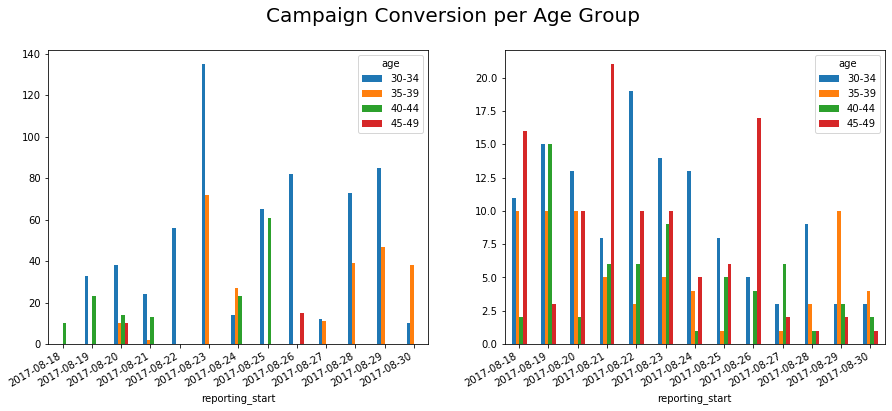

In [14]:
import matplotlib.pyplot as plt

grouped = campaigns.groupby(by=['campaign_id', 'reporting_start', 'age'], as_index=False)['total_conversion'].sum()

fig = plt.figure(1, figsize=(15,6))

#Iterate to create 1 plot campaign at a time
for i, campaign in enumerate(grouped.campaign_id.unique()):
    plt.subplot(1, len(id), i+1)
    df = grouped[grouped['campaign_id'] == campaign].loc[:,['age', 'reporting_start', 'total_conversion']]
    df['reporting_start'] = df['reporting_start'].dt.date
    pivot = df.pivot(index='reporting_start', columns='age', values='total_conversion').fillna(0)
    pivot.plot.bar(ax=plt.gca())

fig.suptitle('Campaign Conversion per Age Group', fontsize=20)
fig.autofmt_xdate()

In [26]:
from datetime import date
imagename = 'plot/'+date.today().strftime(format="%d %b %Y")+'.png'
fig.savefig(imagename)